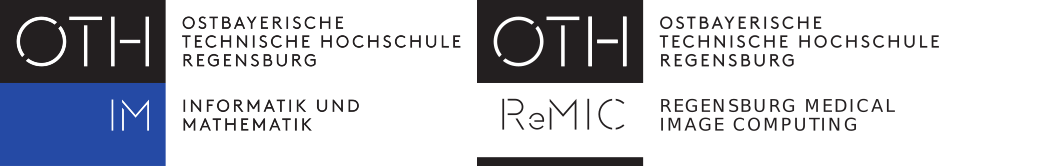<div align="center">

# Grading of Facial Palsy by Machine Learning methods v1.0.0
    

## Use-Cases
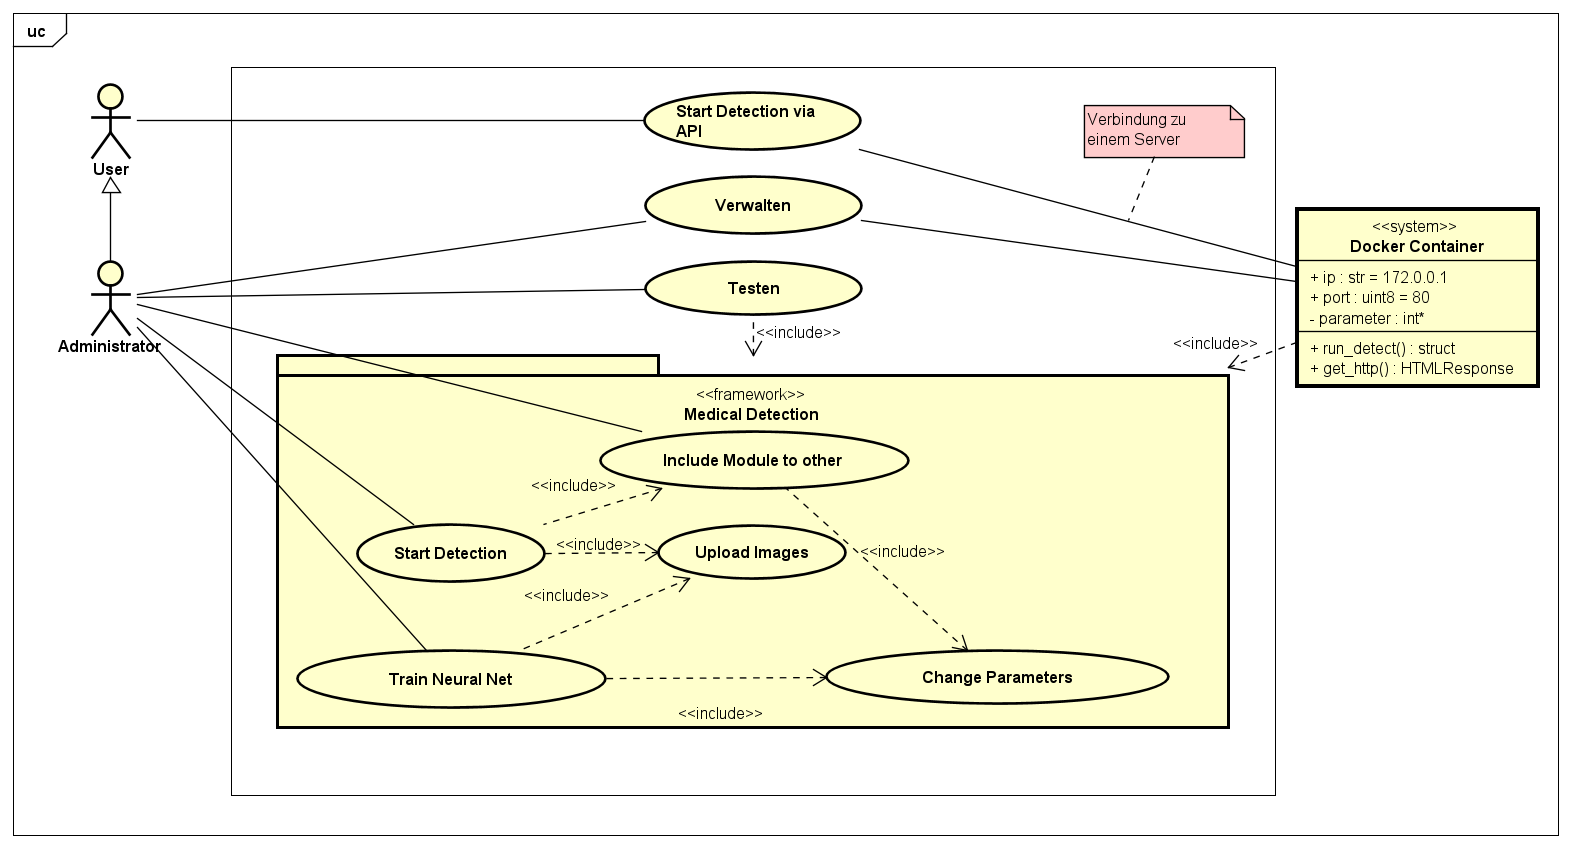

## Used Scheduler and Learning Rate -- Loading Process Vizualisation

SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.01
    lr: 0.01
    momentum: 0.9
    nesterov: True
    weight_decay: 0
)

{'_schedulers': [<torch.optim.lr_scheduler.CosineAnnealingLR object at 0x0000018E74E433D0>, <torch.optim.lr_scheduler.ExponentialLR object at 0x0000018E74E430A0>]}


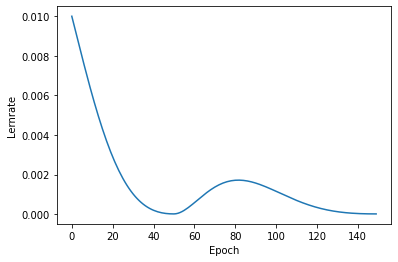

In [1]:
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import yaml
from utils.pytorch_utils import select_optimizer_and_scheduler
from utils.specs import validate_file


model = resnet18(pretrained=True)
epochs = 150

pth = "./models/hyp.yaml"
yml_hyp = validate_file(pth)
scheduler, optimizer = select_optimizer_and_scheduler(yml_hyp, model, epochs)
        
print(optimizer)
print()
print(scheduler)
print(scheduler.__dict__)


lrs1 = []
for i in range(epochs):
    temp = optimizer.state_dict()
    lrs1.append(temp['param_groups'][0]['lr'])
    optimizer.step()
    
    scheduler.step()
    
plt.plot(list(range(epochs)), lrs1, label='')
#plt.legend()
plt.ylabel("Lernrate")
plt.xlabel("Epoch")
#plt.savefig("test.svg")
plt.show()


## Use Moule the other way

In [2]:
import numpy as np

from utils.pytorch_utils import select_device, load_model
from utils.wrapper import Wrapper

module = "hb_direct"
path = "../../test_data/Muskeltransplantation/0001"
wrap = Wrapper.instance()


In [3]:
%matplotlib inline
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt


plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['figure.figsize'] = [20, 10]
orig_img = Image.open("../../test_data/Muskeltransplantation/0001/01.jpg")

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

<class 'torch.Tensor'> torch.Size([27, 640, 640])
<class 'torch.Tensor'> torch.Size([1, 27, 640, 640])

Result of all Classes:  [[-4.4088707   2.1835945  -5.237539    2.8996103   0.25472873  3.6767838 ]]
Result of the best Class:  5


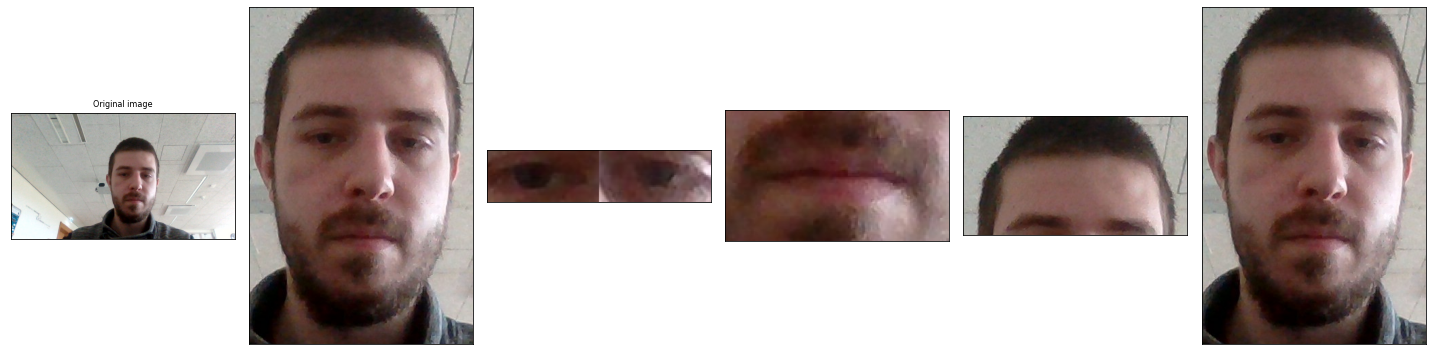

In [4]:
img_list = wrap.get_cut_images_from_one(path, "01", ["symmetry", "eye", "mouth", "forehead", "hb_direct"]) #get cutted images from path/01.jpg
plot(img_list)

device = select_device("cpu")
model = load_model("models", device, module) #Load Model
model.eval()

img = wrap.get_cat_tensor_from_module(path, module) #Conatenated Tensor

print(type(img), img.shape)
if len(img.shape) == 3:
    img = img[None]  # expand for batch dim
print(type(img), img.shape)

pred = model(img.to(device)) #Predict image
res = pred.detach().numpy()

print("")
print("Result of all Classes: ", res)
print("Result of the best Class: ", np.argmax(res))

## Sourcecode Access via import it it is build as Package

In [5]:
import detect as dt
import train as t
from utils.general import set_logging

set_logging("test")

2022-03-12 18:57:00 general.py:set_logging():107 [INFO] --- testEnvironment: Local_Rank=-1 Rank=-1 World-Size=1
2022-03-12 18:57:00 general.py:set_logging():109 [INFO] --- testEnvironment: Cuda-Available=False Device-Count=0 Distributed-Available=True


In [ ]:
dt.run(source="../../test_data", batch_size=4, half=True)
print("Done")

2022-03-12 18:57:00 detect.py:run():76 [INFO] --- detect: Starting Detection...
2022-03-12 18:57:00 pytorch_utils.py:select_device():182 [INFO] --- Torch Version: torch 1.10.0+cpu Selected Devices: CPU

2022-03-12 18:57:00 dataloader.py:__init__():185 [INFO] --- detect: Found 12 Patients. List: ['../../test_data\\Faziale_Reanimation\\0001', '../../test_data\\Faziale_Reanimation\\0002', '../../test_data\\Faziale_Reanimation\\0003', '../../test_data\\Faziale_Reanimation\\0004', '../../test_data\\Faziale_Reanimation\\0005', '../../test_data\\Faziale_Reanimation\\0006', '../../test_data\\Muskeltransplantation\\0001', '../../test_data\\Muskeltransplantation\\0002', '../../test_data\\Muskeltransplantation\\0003', '../../test_data\\Muskeltransplantation\\0004', '../../test_data\\Muskeltransplantation\\0005', '../../test_data\\Muskeltransplantation\\0006']
2022-03-12 18:57:01 dataloader.py:__init__():218 [INFO] --- detect: Using Native Image Access!
2022-03-12 19:11:19 detect.py:run():186 [INF

Done


2022-03-12 19:11:19 train.py:run():97 [INFO] --- train: Starting Training...
2022-03-12 19:11:19 pytorch_utils.py:select_device():182 [INFO] --- Torch Version: torch 1.10.0+cpu Selected Devices: CPU

2022-03-12 19:11:19 dataloader.py:__init__():185 [INFO] --- Setup Train & Validation Data: Found 12 Patients. List: ['../../test_data\\Faziale_Reanimation\\0001', '../../test_data\\Faziale_Reanimation\\0002', '../../test_data\\Faziale_Reanimation\\0003', '../../test_data\\Faziale_Reanimation\\0004', '../../test_data\\Faziale_Reanimation\\0005', '../../test_data\\Faziale_Reanimation\\0006', '../../test_data\\Muskeltransplantation\\0001', '../../test_data\\Muskeltransplantation\\0002', '../../test_data\\Muskeltransplantation\\0003', '../../test_data\\Muskeltransplantation\\0004', '../../test_data\\Muskeltransplantation\\0005', '../../test_data\\Muskeltransplantation\\0006']
2022-03-12 19:11:20 dataloader.py:__init__():218 [INFO] --- Setup Train & Validation Data: Using Native Image Access!
2

Done


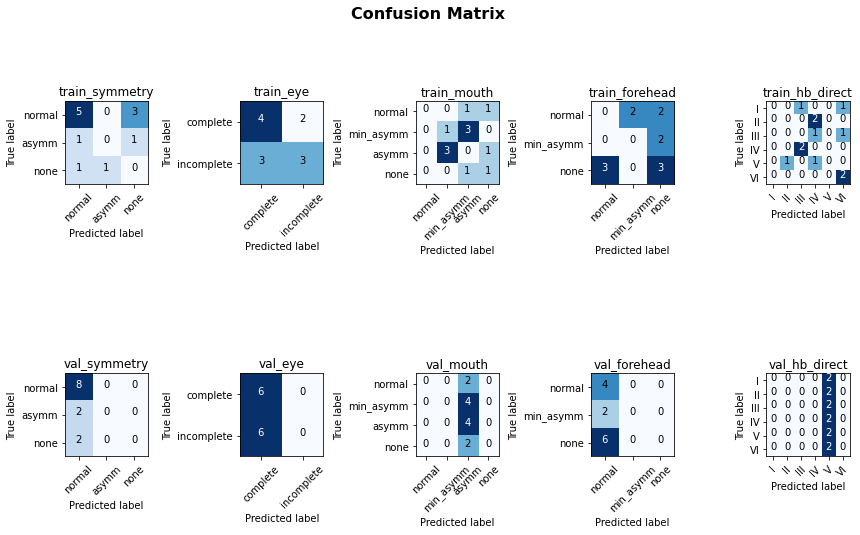

In [7]:
t.run(source="../../test_data", batch_size=4, config="./models/hyp.yaml", epochs=1, nosave=True)
print("Done")

## Unittest code

In [1]:
!python ./unit_test.py

..........................................
----------------------------------------------------------------------
Ran 42 tests in 1415.387s

OK


## Via Commandline

In [2]:
!python detect.py -h

usage: detect.py [-h] [--weights WEIGHTS] [--source SOURCE]
                 [--batch-size BATCH_SIZE] [--device DEVICE] [--half]
                 [--function-selector FUNCTION_SELECTOR] [--convert] [--log]
                 [--debug]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     model folder
  --source SOURCE       file/dir
  --batch-size BATCH_SIZE
                        total batch size for all GPUs
  --device DEVICE       cuda device, i.e. 0 or 0,1,2,3 or cpu
  --half                use FP16 half-precision inference
  --function-selector FUNCTION_SELECTOR
                        funchtions which an be executed or multiple of the
                        list (all or symmetry, eye, mouth, forehead,
                        hb_direct)
  --convert             convert the Classes to their Labels
  --log                 activates log
  --debug               activates debug logging


In [6]:
!python detect.py --source ../../test_data --batch-size 4 --half --device cpu

2022-03-12 20:04:10 general.py:set_logging():106 [INFO] --- detect: weights=models, source=../../test_data, batch_size=4, device=cpu, half=True, function_selector=all, convert=False
2022-03-12 20:04:10 general.py:set_logging():107 [INFO] --- detect: Environment: Local_Rank=-1 Rank=-1 World-Size=1
2022-03-12 20:04:10 general.py:set_logging():109 [INFO] --- detect: Environment: Cuda-Available=False Device-Count=0 Distributed-Available=True
2022-03-12 20:04:10 detect.py:run():76 [INFO] --- detect: Starting Detection...
2022-03-12 20:04:10 pytorch_utils.py:select_device():182 [INFO] --- Torch Version: torch 1.10.0+cpu Selected Devices: CPU

2022-03-12 20:04:10 dataloader.py:__init__():185 [INFO] --- detect: Found 12 Patients. List: ['../../test_data\\Faziale_Reanimation\\0001', '../../test_data\\Faziale_Reanimation\\0002', '../../test_data\\Faziale_Reanimation\\0003', '../../test_data\\Faziale_Reanimation\\0004', '../../test_data\\Faziale_Reanimation\\0005', '../../test_data\\Faziale_Reani

In [7]:
!python train.py -h

usage: train.py [-h] [--weights WEIGHTS] [--source SOURCE] [--config CONFIG]
                [--cache] [--batch-size BATCH_SIZE] [--val-split VAL_SPLIT]
                [--train-split TRAIN_SPLIT] [--device DEVICE] [--nosave]
                [--project PROJECT] [--name NAME] [--epochs EPOCHS]
                [--oversampling] [--log] [--debug]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     model folder
  --source SOURCE       file/dir
  --config CONFIG, --cfg CONFIG
                        path to hyperparamer file
  --cache               Caching Images to a SQLite File (can get really big)
  --batch-size BATCH_SIZE
                        total batch size for all GPUs
  --val-split VAL_SPLIT
                        Factor for splitting Validation for x=len(dataset) fac=Value:                           
                        None  (both --val-split and --train-split)                --> Val=Train=x,                     
            

In [8]:
!python train.py --source ../../test_data --batch-size 4 --epochs 1 --nosave --device cpu

2022-03-12 20:19:01 general.py:set_logging():106 [INFO] --- train: weights=models, source=../../test_data, config=./models/hyp.yaml, cache=False, batch_size=4, val_split=None, train_split=None, device=cpu, nosave=True, project=../../results/train, name=run, epochs=1, oversampling=False
2022-03-12 20:19:01 general.py:set_logging():107 [INFO] --- train: Environment: Local_Rank=-1 Rank=-1 World-Size=1
2022-03-12 20:19:01 general.py:set_logging():109 [INFO] --- train: Environment: Cuda-Available=False Device-Count=0 Distributed-Available=True
2022-03-12 20:19:01 train.py:run():97 [INFO] --- train: Starting Training...
2022-03-12 20:19:01 pytorch_utils.py:select_device():182 [INFO] --- Torch Version: torch 1.10.0+cpu Selected Devices: CPU

2022-03-12 20:19:01 dataloader.py:__init__():185 [INFO] --- Setup Train & Validation Data: Found 12 Patients. List: ['../../test_data\\Faziale_Reanimation\\0001', '../../test_data\\Faziale_Reanimation\\0002', '../../test_data\\Faziale_Reanimation\\0003', 

## Building Python Package

In [9]:
%echo CHANGING FOLDER
%cd ../../


2022-03-12 20:37:16 plotting.py:statistics_criteria_calculation():219 [INFO] --- FP: [4. 1. 3.] --- FN: [3. 2. 3.] --- TP: [1. 0. 3.] --- Tp: [4. 9. 3.]
2022-03-12 20:37:16 plotting.py:statistics_criteria_calculation():220 [INFO] --- Loss: [1.83027816 2.87476563 4.44014263 0.        ] -- 2.2862966060638428
2022-03-12 20:37:16 plotting.py:statistics_criteria_calculation():221 [INFO] --- Sensitivity: [0.25 0.   0.5 ] -- 0.25
2022-03-12 20:37:16 plotting.py:statistics_criteria_calculation():222 [INFO] --- Specificity: [0.5 0.9 0.5] -- 0.6333333333333333
2022-03-12 20:37:16 plotting.py:statistics_criteria_calculation():223 [INFO] --- PPV: [0.2 0.  0.5] -- 0.2333333333333333
2022-03-12 20:37:16 plotting.py:statistics_criteria_calculation():224 [INFO] --- NPV: [0.57142857 0.81818182 0.5       ] -- 0.6298701298701298
2022-03-12 20:37:16 plotting.py:statistics_criteria_calculation():225 [INFO] --- F1 Score: [0.22222222 0.         0.5       ] -- 0.24074074074074073
2022-03-12 20:37:16 plotting

CHANGING FOLDER
C:\Users\bar35643\Desktop\BA_Baumann


In [10]:
!python -m pip install --upgrade build && pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:
!python -m build

* Creating venv isolated environment...
* Installing packages in isolated environment... (setuptools >= 40.8.0, wheel)
* Getting dependencies for sdist...
running egg_info
writing source\hbmedicalprocessing.egg-info\PKG-INFO
writing dependency_links to source\hbmedicalprocessing.egg-info\dependency_links.txt
writing requirements to source\hbmedicalprocessing.egg-info\requires.txt
writing top-level names to source\hbmedicalprocessing.egg-info\top_level.txt
reading manifest file 'source\hbmedicalprocessing.egg-info\SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'source\hbmedicalprocessing.egg-info\SOURCES.txt'
* Building sdist...
running sdist
running egg_info
writing source\hbmedicalprocessing.egg-info\PKG-INFO
writing dependency_links to source\hbmedicalprocessing.egg-info\dependency_links.txt
writing requirements to source\hbmedicalprocessing.egg-info\requires.txt
writing top-level names to source\hbmedicalprocessing.egg-info\top_level.txt
reading manifest file 'sour

In [12]:
!python -m pip install ./dist/hbmedicalprocessing-1.0.0-py3-none-any.whl 

Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\bar35643\desktop\ba_baumann\dist\hbmedicalprocessing-1.0.0-py3-none-any.whl


## Testing if Python Package works 

In [13]:
import hbmedicalprocessing.detect as dt
import hbmedicalprocessing.train as t
from hbmedicalprocessing.utils.general import set_logging

set_logging("test")

2022-03-12 20:38:47 general.py:set_logging():107 [INFO] --- testEnvironment: Local_Rank=-1 Rank=-1 World-Size=1
2022-03-12 20:38:47 general.py:set_logging():109 [INFO] --- testEnvironment: Cuda-Available=False Device-Count=0 Distributed-Available=True


In [14]:
dt.run(source="./test_data", batch_size=4, half=True)
print("Done")

2022-03-12 20:38:48 detect.py:run():76 [INFO] --- detect: Starting Detection...
2022-03-12 20:38:48 pytorch_utils.py:select_device():182 [INFO] --- Torch Version: torch 1.10.0+cpu Selected Devices: CPU

2022-03-12 20:38:48 dataloader.py:__init__():185 [INFO] --- detect: Found 12 Patients. List: ['./test_data\\Faziale_Reanimation\\0001', './test_data\\Faziale_Reanimation\\0002', './test_data\\Faziale_Reanimation\\0003', './test_data\\Faziale_Reanimation\\0004', './test_data\\Faziale_Reanimation\\0005', './test_data\\Faziale_Reanimation\\0006', './test_data\\Muskeltransplantation\\0001', './test_data\\Muskeltransplantation\\0002', './test_data\\Muskeltransplantation\\0003', './test_data\\Muskeltransplantation\\0004', './test_data\\Muskeltransplantation\\0005', './test_data\\Muskeltransplantation\\0006']
2022-03-12 20:38:48 dataloader.py:__init__():218 [INFO] --- detect: Using Native Image Access!
2022-03-12 20:53:57 detect.py:run():186 [INFO] --- detect: Final Results ---> {'./test_data\

Done


2022-03-12 21:16:59 train.py:run():97 [INFO] --- train: Starting Training...
2022-03-12 21:16:59 pytorch_utils.py:select_device():182 [INFO] --- Torch Version: torch 1.10.0+cpu Selected Devices: CPU

2022-03-12 21:16:59 dataloader.py:__init__():185 [INFO] --- Setup Train & Validation Data: Found 12 Patients. List: ['./test_data\\Faziale_Reanimation\\0001', './test_data\\Faziale_Reanimation\\0002', './test_data\\Faziale_Reanimation\\0003', './test_data\\Faziale_Reanimation\\0004', './test_data\\Faziale_Reanimation\\0005', './test_data\\Faziale_Reanimation\\0006', './test_data\\Muskeltransplantation\\0001', './test_data\\Muskeltransplantation\\0002', './test_data\\Muskeltransplantation\\0003', './test_data\\Muskeltransplantation\\0004', './test_data\\Muskeltransplantation\\0005', './test_data\\Muskeltransplantation\\0006']
2022-03-12 21:16:59 dataloader.py:__init__():218 [INFO] --- Setup Train & Validation Data: Using Native Image Access!
2022-03-12 21:16:59 dataloader.py:__init__():345 

Done


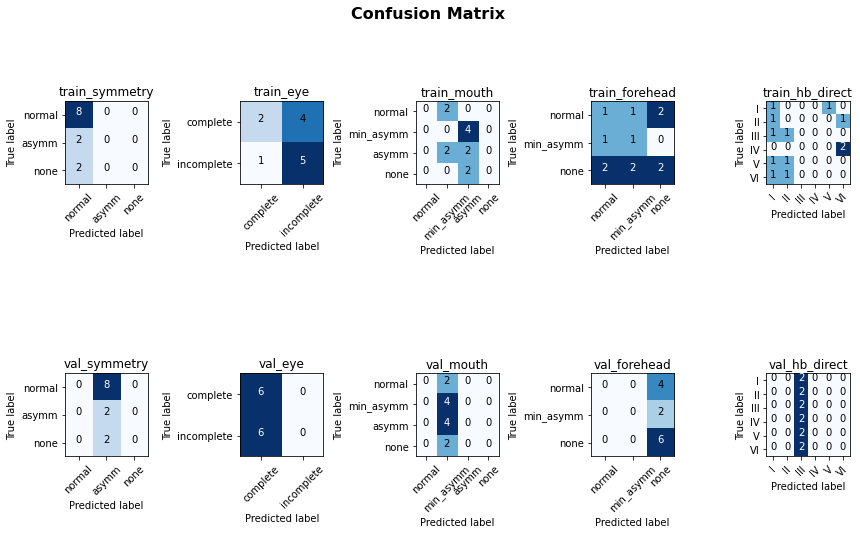

In [17]:
t.run(source="./test_data", batch_size=4, config="./source/hbmedicalprocessing/models/hyp.yaml", epochs=1, nosave=True)
print("Done")